<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/Ex2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization terminated successfully.
         Current function value: 11.227869
         Iterations: 20
         Function evaluations: 764
[11.21627557  0.31698286  0.73849909]
14.091494044215374 0.1510704088190618 0.8383853884574348


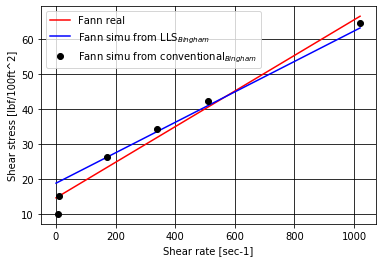

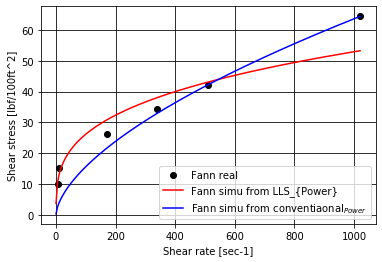

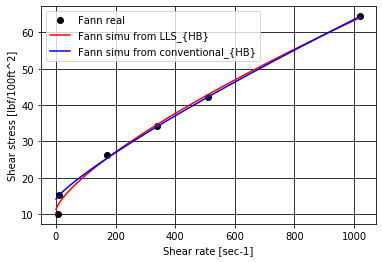

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Fann readings

theta=np.array([[60.4,39.6,32.1,24.5,14.2,9.4]])
gamma=np.array([600,300,200,100,6,3])

# conversional factors

k1=1.067        #in lbf/100ft^2
k2=1.7023       # s^-1
k3=478.8        # convert lbf/100ft^2 to cPoise

theta_cp=k1*theta
gamma_s=k2*gamma
gamma_c=np.arange(0.1*k2,600*k2,5)

# Bingham Plastic Model

# LLS method implementation 
X=np.concatenate(([np.ones(len(theta[0]))],[gamma_s]),axis=0)
Y=theta_cp;

bp=np.matmul(np.matmul(np.linalg.inv(np.matmul(X,X.transpose())),X),Y.transpose())
tau0_BP=bp[0][0]
pv_BP=bp[1][0]

tau_BP = tau0_BP + pv_BP*gamma_c

#conventional method implementation
pv_BPc=(theta[0][0]-theta[0][1])
tau0_BPc=theta[0][1]-pv_BPc

tau_BPc = tau0_BPc + pv_BPc/k3*gamma_c           #lbf/100ft^2

plt.figure(1)
plt.plot(gamma_c, tau_BP,'r-')
plt.plot(gamma_c, tau_BPc,'b-')
plt.plot(gamma_s, theta_cp[0],'ko')

plt.ylabel('Shear stress [lbf/100ft^2]')
plt.xlabel('Shear rate [sec-1]')
plt.legend(['Fann real','Fann simu from LLS$_{Bingham}$','Fann simu from conventional$_{Bingham}$'])
plt.grid(color='k')
X

# Power Law Model

# LLS method implementation 
X=np.concatenate(([np.ones(len(theta[0]))],[np.log(gamma_s)]),axis=0)
Y=np.log(theta_cp)

pl=np.matmul(np.matmul(np.linalg.inv(np.matmul(X,X.transpose())),X),Y.transpose())

n_PL=pl[1]
K_PL=np.exp(pl[0])

tau_PL = K_PL*(gamma_c)**n_PL           #lbf/100ft^2

#conventional method implementation
n_PLc=np.log((theta[0][0]/theta[0][1]))/np.log((gamma[0]/gamma[1]))
K_PLc=k1*theta[0][0]/((gamma[0]*k2)**n_PLc)

tau_PLc = K_PLc*(gamma_c)**n_PLc           #lbf/100ft^2


plt.figure(2)
plt.plot(gamma_s, theta_cp[0],'ko')
plt.plot(gamma_c, tau_PL,'r-')
plt.plot(gamma_c, tau_PLc,'b-')
plt.ylabel('Shear stress [lbf/100ft^2]')
plt.xlabel('Shear rate [sec-1]')
plt.legend(['Fann real','Fann simu from LLS_{Power}','Fann simu from conventiaonal$_{Power}$'])
plt.grid(color='k')
gamma[0]



# H-B model

# LLS method implementation 
def objective(x):
    parameter=np.array([[1021.38,510.69,340.46,170.23,10.2138,5.1069],[64.4468,42.2532,34.2507,26.1415,15.1514,10.0298]])
    X=parameter[0,:]
    Y=parameter[1,:]
    f=0
    for i in range(0,len(X)):
        f = f+(Y[i]-x[0]-x[1]*X[i]**x[2])**2
    return f


from scipy.optimize import minimize

x0=[15,.1,.9]
sol=minimize(objective,x0,method='powell',options={'disp':True})

print(sol.x)
tau0_HB=sol.x[0]
K_HB=sol.x[1]
n_HB=sol.x[2]

tau_HB = tau0_HB+ K_HB*(gamma_c)**n_HB;           #lbf/100ft^2

#conventional method implementation
from scipy.optimize import fsolve

def equations(p):
    x, y, z = p
    theta_cp_n=np.array([64.4468,42.2532,15.1514])
    gamma_s_n=np.array([1021.4,510.69,10.2138])

    #theta_cp_n=np.array([theta[0],theta[1],theta[4]])
    #gamma_s_n=np.array([gamma[0],gamma[1],gamma[4]])
    return (theta_cp_n[0]-x-y*(gamma_s_n[0])**z, 
            theta_cp_n[1]-x-y*(gamma_s_n[1])**z,
            theta_cp_n[2]-x-y*(gamma_s_n[2])**z)
def HB():
    tau0_HBc, K_HBc, n_HBc =  fsolve(equations, (1,1,1))
    print(tau0_HBc, K_HBc, n_HBc)
    return tau0_HBc, K_HBc, n_HBc

#theta_cp_n=[theta_cp[0],theta_cp[1],theta_cp[2]];
#gamma_s_n=[gamma_s[0],gamma_s[1],gamma_s[2]];
Coefficient_HBc=HB(); #solve the nonlinear equations to get tau0, K and n
tau0_HBc=Coefficient_HBc[0]
K_HBc=Coefficient_HBc[1]
n_HBc=Coefficient_HBc[2]

tau_HBc = tau0_HBc+ K_HBc*(gamma_c)**n_HBc           #lbf/100ft^2

plt.figure(3)
plt.plot(gamma_s, theta_cp[0],'ko')
plt.plot(gamma_c, tau_HB,'r-')
plt.plot(gamma_c, tau_HBc,'b-')
plt.ylabel('Shear stress [lbf/100ft^2]');
plt.xlabel('Shear rate [sec-1]');
plt.legend(['Fann real','Fann simu from LLS_{HB}','Fann simu from conventional_{HB}']);
plt.grid(color='k')